<a href="https://colab.research.google.com/github/VedithVarma/ML_LAB_1BM22CS339/blob/main/1BM22CS339_LAB3_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'0.37 is less than 0.5 which means person with 35 will not buy the insurance'

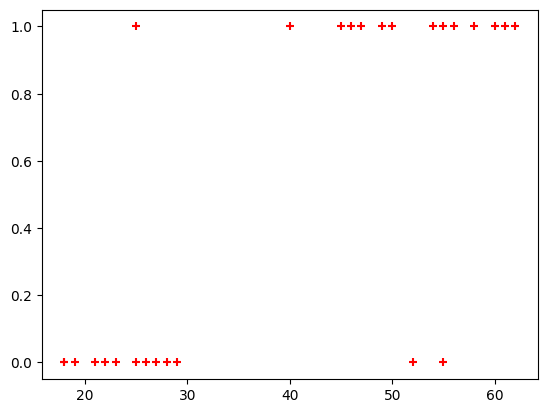

In [ ]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Binary.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1M8PXdcmPsrQtqyVXpET3sgghAMr_MCg5
"""

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline
#"%matplotlib inline" will make your plot outputs appear and be stored within the notebook.

df = pd.read_csv("insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

"""0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


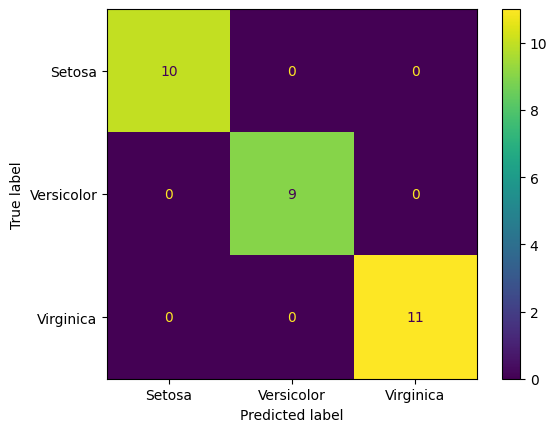

In [ ]:
# -*- coding: utf-8 -*-
"""LogisticRegression_Multiclass.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1anBybVXILenh0a_R4aM_ZemLrEqYWnJl
"""

# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

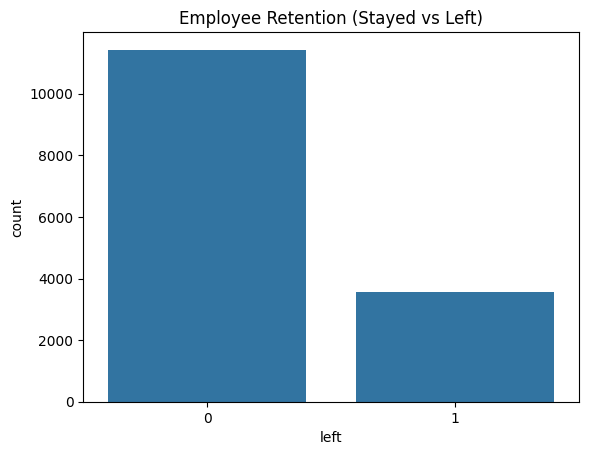

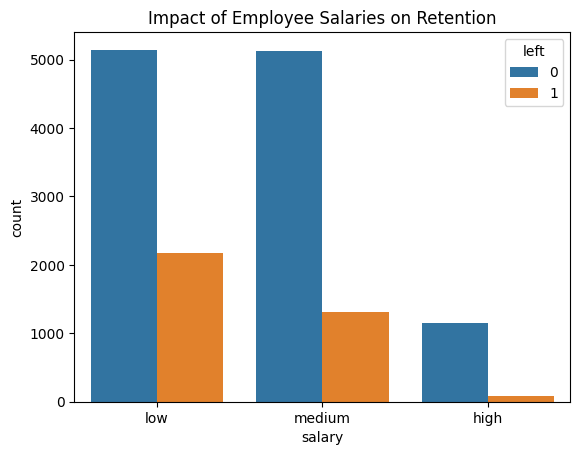

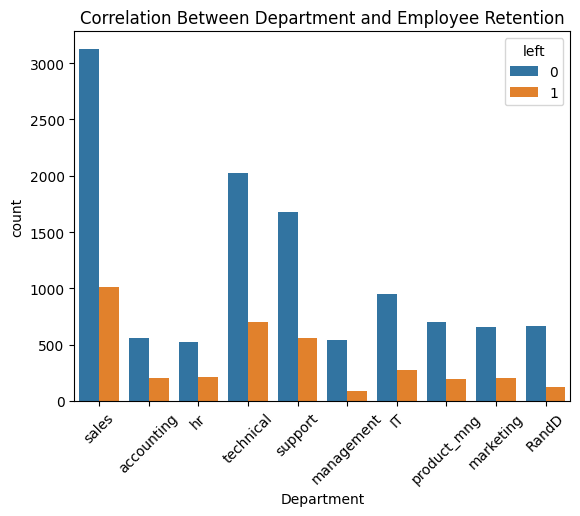

Accuracy of Logistic Regression Model: 79.63%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


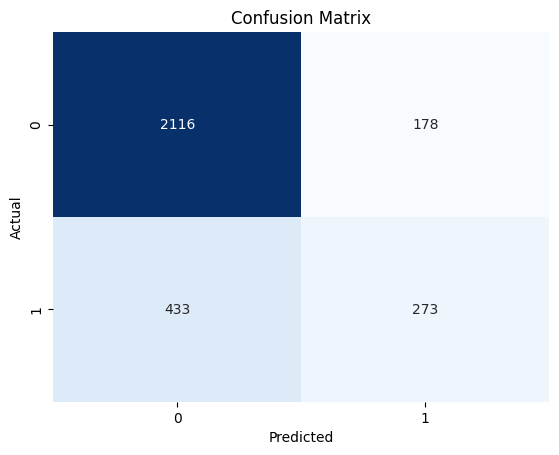

In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv('HR_comma_sep.csv')

# 1. Exploratory Data Analysis (EDA)

# Check the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Describe the dataset (summary statistics)
print(df.describe())

# Check the distribution of 'left' column (Employee Retention: 1 means left, 0 means stayed)
sns.countplot(x='left', data=df)
plt.title("Employee Retention (Stayed vs Left)")
plt.show()

# 2. Impact of Employee Salaries on Retention
# Plotting bar chart showing impact of employee salaries on retention
sns.countplot(x='salary', hue='left', data=df)
plt.title("Impact of Employee Salaries on Retention")
plt.show()

# 3. Correlation between Department and Employee Retention
# Plotting bar chart showing correlation between department and retention
sns.countplot(x='Department', hue='left', data=df)
plt.title("Correlation Between Department and Employee Retention")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# 4. Build Logistic Regression Model

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split the dataset into features (X) and target (y)
X = df_encoded.drop('left', axis=1)  # Features (drop the 'left' column as it's the target)
y = df_encoded['left']  # Target: whether the employee left (1) or stayed (0)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

# 5. Measure Model Accuracy

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy * 100:.2f}%")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
Class_Type     0
dtype: int64
Accuracy of Logistic Regression Model: 95.24%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


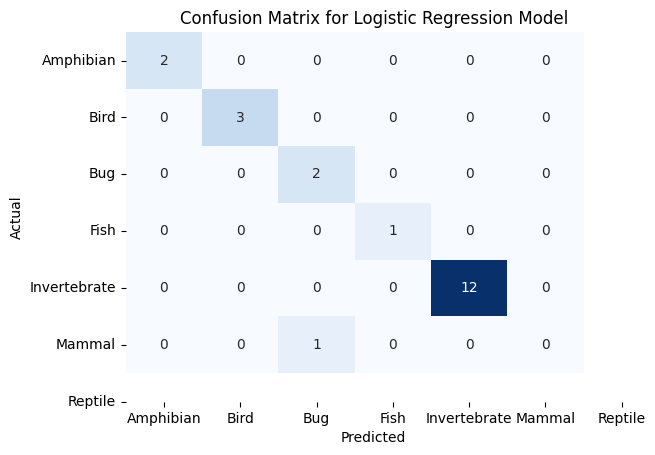

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the datasets
zoo_data = pd.read_csv('zoo-data.csv')
class_type = pd.read_csv('zoo-class-type.csv')

# 1. Data Preprocessing: Merge datasets to get class_type
zoo_data = zoo_data.merge(class_type[['Class_Number', 'Class_Type']], how='left', left_on='class_type', right_on='Class_Number')

# Drop the unnecessary 'Class_Number' column and keep 'Class_Type' as the target variable
zoo_data.drop(columns=['Class_Number'], inplace=True)

# Check for missing values
print(zoo_data.isnull().sum())

# Since we don't have missing values, we can proceed to encode categorical variables and model building.

# 2. Feature Engineering: Encode categorical variables
# Here, we'll encode 'class_type' which is now 'Class_Type' into numeric labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Class_Type' (target) into numerical labels
zoo_data['Class_Type'] = label_encoder.fit_transform(zoo_data['Class_Type'])

# 3. Split the data into features (X) and target (y)
X = zoo_data.drop(['animal_name', 'class_type', 'Class_Type'], axis=1)  # Features
y = zoo_data['Class_Type']  # Target

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Build Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, multi_class='ovr')  # Using 'ovr' for multiclass classification
logreg_model.fit(X_train, y_train)

# 6. Predictions and Accuracy
y_pred = logreg_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy * 100:.2f}%")

# 7. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
